## Data Cleaning Cuts

This notebook takes in a dataset with predicted SVM labels and traditional data cleaning parameters to compare cut performances. First, we load modules and files.

In [4]:
# Load modules

import time, pickle, json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set defaults for figures

%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='bright')
plt.style.use('../clint.mpl')

# Load files
    
with open('../data/p03_r003_test_data.pickle', 'rb') as data:
    data_dict = pickle.load(data)

Here we load waveforms into variables and other parameters into a pandas DataFrame.

In [6]:
dwt_norm = data_dict['dwt_norm']
wf_norm = data_dict['wf_norm']

In [7]:
del data_dict['dwt_norm']
del data_dict['wf_norm']
df = pd.DataFrame.from_dict(data_dict, orient='columns')

Once we have everything loaded, we define traditional and machine learning data cleaning cuts. The current traditional cuts are valid for events with energies **> 25 keV**, so we define the machine learning cuts with this threshold as well.

In [9]:
# Traditional cut

trad_dc_cut = (df['is_valid_0vbb'] == True) & (df['is_neg_energy'] == False) \
                & (df['is_valid_tail'] == True) & (df['is_valid_baseline'] == True) \
                & (df['is_noise_burst'] == False) & (df['cuspEmax_ctc_cal'] > 25)
energy_trad_cut = df['cuspEmax_ctc_cal'][trad_dc_cut]

# Machine learning cut 

ml_dc_cut = ((df['svm_label'] == 0) | (df['svm_label'] == 4)) \
            & (df['cuspEmax_ctc_cal'] > 25)
energy_ml_cut = df['cuspEmax_ctc_cal'][ml_dc_cut]

# Energy threshold cut

thresh_cut = (df['cuspEmax_ctc_cal'] > 25)
energy_thresh_cut = df['cuspEmax_ctc_cal'][thresh_cut]

We then look at the energy spectra before and after cuts.

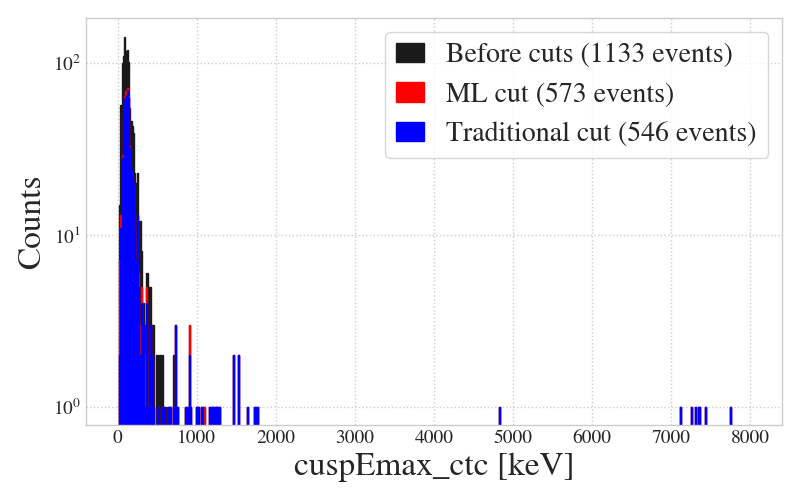

In [11]:
%matplotlib widget

fig, ax = plt.subplots(1,1)
ax.hist(energy_thresh_cut, bins=500, range=(0,8000),
        label =f'Before cuts ({energy_thresh_cut.shape[0]} events)', color='k', ec="k")
ax.hist(energy_ml_cut, bins=500, range=(0,8000),
        label =f'ML cut ({energy_ml_cut.shape[0]} events)', color='red', ec="red")
ax.hist(energy_trad_cut, bins=500, range=(0,8000), 
        label =f'Traditional cut ({energy_trad_cut.shape[0]} events)', color='blue', ec="blue")


plt.xlabel('cuspEmax_ctc [keV]', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.yscale('log')
plt.legend(loc='best', fontsize=20, fancybox=True)

Finally, we look at events that are kept/cut by both methods, those that are cut by one method but kept by the other, and vice versa. 

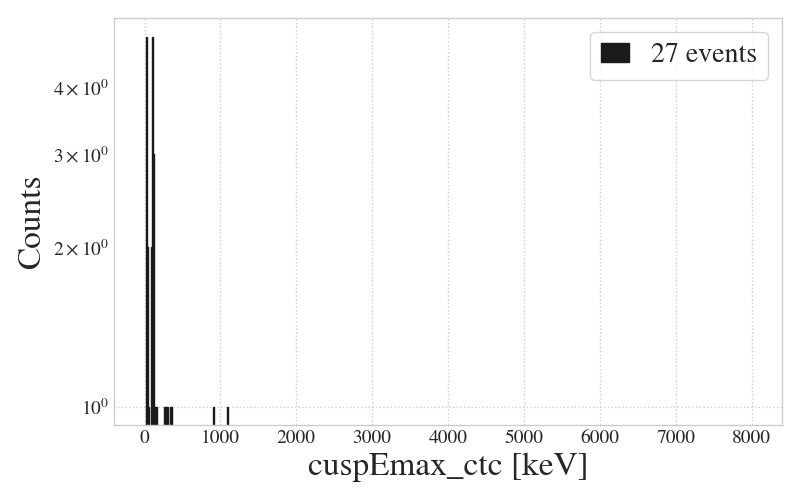

In [12]:
%matplotlib widget

cut = ml_dc_cut & ~trad_dc_cut 

fig, ax = plt.subplots(1,1)
ax.hist(df['cuspEmax_ctc_cal'][cut], bins=500, range=(0,8000), \
        label =f'{df["cuspEmax_ctc_cal"][cut].shape[0]} events', color='k', ec="k")

plt.xlabel('cuspEmax_ctc [keV]', fontsize=24)
plt.ylabel('Counts', fontsize=24)
plt.yscale('log')
plt.legend(loc='best', fontsize=20, fancybox=True)

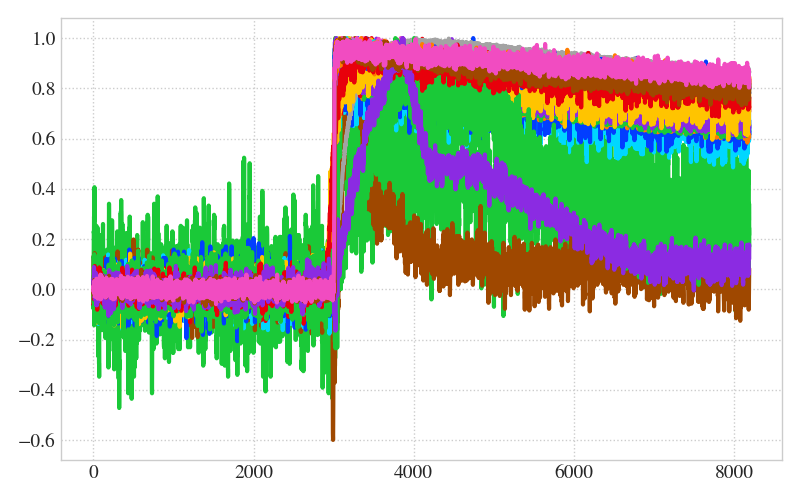

In [13]:
# Look at waveforms within the desired cut

samples = np.where(cut)[0]

%matplotlib widget

for i in samples[0:100]:
    plt.plot(wf_norm[i]) 